If you haven't yet, check out the brief introduction [here](README.md). 

We start by importing the (newly) installed modules

# Data exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The data that I will be using is the *House Sales in King County, USA* data set.
It is available on Kaggle at https://www.kaggle.com/harlfoxem/housesalesprediction.
After downloading it we can load it up and display it.

In [2]:
house_data = pd.read_csv("kc_house_data.csv")
house_data.head()

,id,date,price,...,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,...,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,...,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,...,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,...,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,...,-122.045,1800,7503


Before we go any further we should split the data into training and testing data.
We wouldn't wanna spoil our opportunity to get a realistic estimate of our performance!

In [3]:
# Set seed for reproducibility
np.random.seed(324976)

# Randomly pick 70% of the data as tranining points
df = house_data.sample(frac=0.7)

# Assign the remaining points to the test set
df_test = house_data[~house_data.index.isin(df.index)]

print(house_data.shape)
[d.shape for d in [df, df_test]]

(21613, 21)


[(15129, 21), (6484, 21)]

Okay, so far so good. We see that we have a total of 21,613 rows (or houses) of which we put away 30% for our test set.
Thus we have 15129 remaining points to learn from.

One of the first helpful things to do to gain insight into our data is to make some basic histograms.
To declutter the notebook, I've defined my plotting functions in the `plotting_functions.py` module.

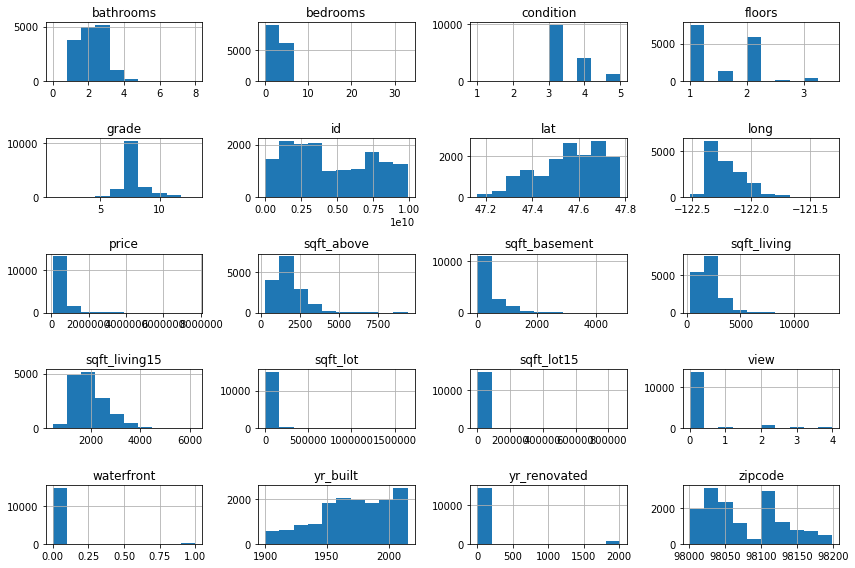

In [4]:
# Import custom histogram function
from plotting_functions import histogram

histogram(df=df)

Another useful first step is to call the `.info()` function 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15129 entries, 6969 to 5648
Data columns (total 21 columns):
id               15129 non-null int64
date             15129 non-null object
price            15129 non-null float64
bedrooms         15129 non-null int64
bathrooms        15129 non-null float64
sqft_living      15129 non-null int64
sqft_lot         15129 non-null int64
floors           15129 non-null float64
waterfront       15129 non-null int64
view             15129 non-null int64
condition        15129 non-null int64
grade            15129 non-null int64
sqft_above       15129 non-null int64
sqft_basement    15129 non-null int64
yr_built         15129 non-null int64
yr_renovated     15129 non-null int64
zipcode          15129 non-null int64
lat              15129 non-null float64
long             15129 non-null float64
sqft_living15    15129 non-null int64
sqft_lot15       15129 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.5+ MB


Now we have a little more information about the columns.
We have general info about the size and number of each type of room;
the year of which the house was built and renovated;
some qualitative notions of "condition" and "grade" as well as "view";
and information about the location in the form of coordinates and zipcode.

A few questions come to mind regarding the columns that are less clear.
What is the difference between sqft_living and sqft_living15 for example?
And what exactly is in the columns waterfront, condition, grade?
To answer these questions we can go back to Kaggle where we found the data.